In [ ]:
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iowa_liquor_merged_pd= pd.read_csv("../ETL-PROJECT-/liquor_brand_merged.csv")

iowa_liquor_merged_df = pd.DataFrame(iowa_liquor_merged_pd)
iowa_liquor_merged_df


#iowa_liquor_2017 = iowa_liquor_merged_df.loc[iowa_liquor_merged_df['year']== 2017]
#iowa_liquor_2017

/Users/sofiahorenstein/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Invoice/Item Number,Date,City,Zip Code,County Number,County,Category,Item Number,brand,...,id,categories,name,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,0,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV13DvNcGV-KLJ3akOr1,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-10-22T08:00:00.000Z,3,https://redsky.target.com/groot-domain-api/v1/...,We buy this bottle every week but the only thi...,I Would Buy This Drink Again And Again If,Black Smell,http://redsky.target.com/v1/plp/search?kwr=y&c...
1,1,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV13DvNcGV-KLJ3akOr1,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-11-29T08:00:00.000Z,5,https://redsky.target.com/groot-domain-api/v1/...,I just bought a fifth of Jim Beam Apple and mi...,Try It With Ice Cold Mtn Dew,Sweetlisa,http://redsky.target.com/v1/plp/search?kwr=y&c...
2,2,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV13DvNcGV-KLJ3akOr1,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-09-06T07:00:00.000Z,5,https://redsky.target.com/groot-domain-api/v1/...,I went to my local store to purchase another a...,Great Product,Prettyeyz,http://redsky.target.com/v1/plp/search?kwr=y&c...
3,3,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV13DvNcGV-KLJ3akOr1,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-07-14T07:00:00.000Z,5,https://redsky.target.com/groot-domain-api/v1/...,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,http://redsky.target.com/v1/plp/search?kwr=y&c...
4,4,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV13DvNcGV-KLJ3akOr1,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-05-28T07:00:00.000Z,5,https://redsky.target.com/groot-domain-api/v1/...,I mix the Jim Beam apple with a little ginger ...,Surprising And Refreshing,Tater,http://redsky.target.com/v1/plp/search?kwr=y&c...
5,5,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV6c37HHuC1rwyj_eU89,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14T00:00:00.000Z,3,https://www.walmart.com/reviews/product/47183732,"Very smooth, but very sweet. I would like to k...",Sweet and smooth.,Ryan,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...
6,6,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV6c37HHuC1rwyj_eU89,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-08-10T00:00:00.000Z,5,https://www.walmart.com/reviews/product/47183732,It's delish! The only suggestion I have is to ...,The best,Jared,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...
7,7,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV6c37HHuC1rwyj_eU89,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14T00:00:00.000Z,5,https://www.walmart.com/reviews/product/47183732,I love everything about Jim Beam Apple... The ...,I recommend this drink to everyone over the ag...,Baltimore,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...
8,8,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim Beam,...,AV6c37HHuC1rwyj_eU89,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14T00:00:00.000Z,5,https://www.walmart.com/reviews/product/47183732,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...
9,9,S25042400112,2015-04-14,ORANGE CITY,51041,84.0,Sioux,1011200.0,19066,Jim

In [4]:
iowa_liquor_merged_df['Date'] = pd.to_datetime(iowa_liquor_merged_df['Date'])

In [7]:
iowa_liquor_year_drop = iowa_liquor_merged_df[iowa_liquor_merged_df['year']!=2016]
iowa_liquor_year_drop_2=iowa_liquor_year_drop[iowa_liquor_year_drop['year']!=2015]
iowa_liquor_year_drop_2.keys()

Index(['Unnamed: 0', 'Invoice/Item Number', 'Date', 'City', 'Zip Code',
       'County Number', 'County', 'Category', 'Item Number', 'brand',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'year', 'Unnamed: 0.1', 'id', 'categories',
       'name', 'reviews.date', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [27]:
iowa_liquor_year_drop_2['Date'] = pd.to_datetime(iowa_liquor_year_drop_2['Date'])
iowa_liquor_year_drop_2['month'] = iowa_liquor_year_drop_2['Date'].dt.month
iowa_liquor_year_drop_2.sort_values(by=["month"], ascending=False).groupby('month').count()

/Users/sofiahorenstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sofiahorenstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Invoice/Item Number,Date,City,Zip Code,County Number,County,Category,Item Number,brand,...,id,categories,name,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
month,,,,,,,,,,,,,,,,,,,,,
1,243191,243191,243191,243191,243191,243191,243191,243191,243191,243191,...,243191,243191,243191,243191,243191,243191,243191,243191,243191,243191
2,232239,232239,232239,232239,232239,232239,232239,232239,232239,232239,...,232239,232239,232239,232239,232239,232239,232239,232239,232239,232239
3,289676,289676,289676,289676,289676,289676,289676,289676,289676,289676,...,289676,289676,289676,289676,289676,289676,289676,289676,289676,289676
4,246591,246591,246591,246591,246591,246591,246591,246591,246591,246591,...,246591,246591,246591,246591,246591,246591,246591,246591,246591,246591
5,309128,309128,309128,309128,309128,309128,309128,309128,309128,309128,...,309128,309128,309128,309128,309128,309128,309128,309128,309128,309128
6,302555,302555,302555,302555,302555,302555,302555,302555,302555,302555,...,302555,302555,302555,302555,302555,302555,302555,302555,302555,302555
7,256207,256207,256207,256207,256207,256207,256207,256207,256207,256207,...,256207,256207,256207,256207,256207,256207,256207,256207,256207,256207
8,321815,321815,321815,321815,321815,321815,321815,321815,321815,321815,...,321815,321815,321815,321815,321815,321815,321815,321815,321815,321815
9,253218,253218,253218,253218,253218,253218,253218,253218,253218,253218,...,253218,253218,253218,253218,253218,253218,253218,253218,253218,253218


In [30]:
iowa_liquor_month_drop = iowa_liquor_year_drop_2[iowa_liquor_year_drop_2['month']!=1]
iowa_liquor_month_drop_2=iowa_liquor_month_drop[iowa_liquor_month_drop['month']!=2]
iowa_liquor_month_drop_3 = iowa_liquor_month_drop_2[iowa_liquor_month_drop_2['month']!=3]
iowa_liquor_month_drop_4 =iowa_liquor_month_drop_3[iowa_liquor_month_drop_3['month']!=4]
iowa_liquor_month_drop_5 = iowa_liquor_month_drop_4[iowa_liquor_month_drop_4['month']!=5]
iowa_liquor_month_drop_6 =iowa_liquor_month_drop_5[iowa_liquor_month_drop_5['month']!=6]
iowa_liquor_month_drop_7 = iowa_liquor_month_drop_6[iowa_liquor_month_drop_6['month']!=7]
iowa_liquor_month_drop_8=iowa_liquor_month_drop_7[iowa_liquor_month_drop_7['month']!=8]
iowa_liquor_month_drop_9 = iowa_liquor_month_drop_8[iowa_liquor_month_drop_8['month']!=9]
iowa_liquor_month_drop_9

,Unnamed: 0,Invoice/Item Number,Date,City,Zip Code,County Number,County,Category,Item Number,brand,...,categories,name,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,month
8583435,8583435,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-10-22 08:00:00+00:00,3,https://redsky.target.com/groot-domain-api/v1/...,We buy this bottle every week but the only thi...,I Would Buy This Drink Again And Again If,Black Smell,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583436,8583436,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-11-29 08:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I just bought a fifth of Jim Beam Apple and mi...,Try It With Ice Cold Mtn Dew,Sweetlisa,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583437,8583437,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-09-06 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I went to my local store to purchase another a...,Great Product,Prettyeyz,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583438,8583438,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-07-14 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583439,8583439,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-05-28 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I mix the Jim Beam apple with a little ginger ...,Surprising And Refreshing,Tater,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583440,8583440,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,3,https://www.walmart.com/reviews/product/47183732,"Very smooth, but very sweet. I would like to k...",Sweet and smooth.,Ryan,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583441,8583441,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-08-10 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,It's delish! The only suggestion I have is to ...,The best,Jared,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583442,8583442,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,I love everything about Jim Beam Apple... The ...,I recommend this drink to everyone over the ag...,Baltimore,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583443,8583443,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583444,8583444,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beve

In [ ]:
iowa_liquor_month_drop_11.sort_values(by=["month"], ascending=False).groupby('month').count()

In [ ]:
iowa_liquor_2017_12 = iowa_liquor_2017.loc[iowa_liquor_2017['month']== 12]
iowa_liquor_2017_12
iowa_liquor_2017_12.to_csv("iowa_liquor_2017_12")

In [51]:
iowa_liquor_month_drop_9.to_csv("Iowa_liquor_final")

In [34]:
iowa_liquor_month_drop_9['Sale (Dollars)'].head()

8583435    15.74
8583436    15.74
8583437    15.74
8583438    15.74
8583439    15.74
Name: Sale (Dollars), dtype: float64

In [32]:
iowa_liquor_month_drop_9["Sale (Dollars)"] = iowa_liquor_month_drop_9["Sale (Dollars)"].str.replace('$', '')

/Users/sofiahorenstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
iowa_liquor_month_drop_9["Sale (Dollars)"]= iowa_liquor_month_drop_9["Sale (Dollars)"].astype(float)
#iowa_liquor_2017_12.dtypes

/Users/sofiahorenstein/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
#iowa_liquor_2017.rename(columns={"Unnamed: 0": "unnamed_iowa","Item Description": 'brand', "Invoice/Item Number": "Invoice_Item_Number", "Zip Code": "Zip_Code", "County Number": "County_Number", "Item Number": "Item_Number", "Item Description": "Item_Description", "Bottle Volume (ml)": "Bottle_Volume", "State Bottle Cost": "State_Bottle_Cost", "State Bottle Retail": "State_Bottle_Retail", "Bottles Sold": "Bottles_Sold", "Sale (Dollars)": "Sale", "Volume Sold (Liters)" :"Volume_Sold", "Unnamed: 0.1" : "unnamed_review",
 #'reviews.date': 'reviews_date', 'reviews.rating': "reviews_rating", 'reviews.sourceURLs': "reviews_sourceURLs", 
       #'reviews.text': "reviews_text", 'reviews.title':"review_title", 'reviews.username':"reviews_username"}, inplace=True)
iowa_liquor_month_drop_9
                        

,Unnamed: 0,Invoice/Item Number,Date,City,Zip Code,County Number,County,Category,Item Number,brand,...,categories,name,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,month
8583435,8583435,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-10-22 08:00:00+00:00,3,https://redsky.target.com/groot-domain-api/v1/...,We buy this bottle every week but the only thi...,I Would Buy This Drink Again And Again If,Black Smell,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583436,8583436,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-11-29 08:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I just bought a fifth of Jim Beam Apple and mi...,Try It With Ice Cold Mtn Dew,Sweetlisa,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583437,8583437,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-09-06 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I went to my local store to purchase another a...,Great Product,Prettyeyz,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583438,8583438,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-07-14 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583439,8583439,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",Jim Beam174 Apple Bourbon Whiskey - 750ml Bottle,2017-05-28 07:00:00+00:00,5,https://redsky.target.com/groot-domain-api/v1/...,I mix the Jim Beam apple with a little ginger ...,Surprising And Refreshing,Tater,http://redsky.target.com/v1/plp/search?kwr=y&c...,10
8583440,8583440,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,3,https://www.walmart.com/reviews/product/47183732,"Very smooth, but very sweet. I would like to k...",Sweet and smooth.,Ryan,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583441,8583441,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-08-10 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,It's delish! The only suggestion I have is to ...,The best,Jared,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583442,8583442,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,I love everything about Jim Beam Apple... The ...,I recommend this drink to everyone over the ag...,Baltimore,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583443,8583443,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beverages,Beer, Wine & Spirits,Spirits","Jim Beam Apple Bourbon Whiskey, 100.0 ML",2017-07-14 00:00:00+00:00,5,https://www.walmart.com/reviews/product/47183732,"I was hesitant to buy Jim Beam Apple, after tr...",Fantastic,Hannah,https://www.walmart.com/ip/Jim-Beam-Apple-Bour...,10
8583444,8583444,INV-07543100007,2017-10-02,Des Moines,50317,77.0,Polk,1011200.0,19066,Jim Beam,...,"Food,Beve

In [35]:
#find the mean values for each unique brand
liquor_brand_rating = iowa_liquor_month_drop_9[["brand", "reviews.rating"]]
liquor_brand_rating_mean = liquor_brand_rating.groupby("brand").mean()
liquor_brand_rating_mean

,reviews.rating
brand,
Crown Royal,5.000000
Disaronno,4.000000
Jim Beam,4.874074
Jim Beam Black,5.000000


In [36]:
#total sales by brand 
liquor_brand_sales = iowa_liquor_month_drop_9[["brand", "Sale (Dollars)"]]
liquor_brand_sales_total = liquor_brand_sales.groupby("brand").sum()
liquor_brand_sales_total

,Sale (Dollars)
brand,
Crown Royal,1.393632e+05
Disaronno,4.539000e+02
Jim Beam,2.944076e+07
Jim Beam Black,1.934059e+05


In [37]:
#items count by brand
liquor_brand_sales_count = liquor_brand_sales.groupby("brand").count()
liquor_brand_sales_count

,Sale (Dollars)
brand,
Crown Royal,1022
Disaronno,10
Jim Beam,298080
Jim Beam Black,2834


In [38]:
#items count by county and brand 
liquor_brand_sales_county = iowa_liquor_month_drop_9[["brand", "Sale (Dollars)", "County"]]
liquor_brand_sales_county_total = liquor_brand_sales_county.groupby(["County", "brand"]).count()
liquor_brand_sales_county_total

Sale (Dollars)
County      brand                         
Adair       Crown Royal                  3
            Jim Beam                   810
Adams       Jim Beam                   540
Allamakee   Crown Royal                  2
            Jim Beam                  1620
            Jim Beam Black              26
Appanoose   Crown Royal                  1
            Jim Beam                  1080
Audubon     Crown Royal                  1
            Jim Beam                   270
Benton      Crown Royal                  6
            Jim Beam                  1485
Black Hawk  Crown Royal                 32
            Jim Beam                 15255
            Jim Beam Black             260
Boone       Crown Royal                  7
            Jim Beam                  2295
Bremer      Crown Royal                  5
            Disaronno                    1
            Jim Beam                  2430
            Jim Beam Black              26
Buchanan    Crown Royal                  8
            Jim Beam                  2430
Buena Vista Crown Royal                  3
            Disaronno                    2
            Jim Beam                  2295
            Jim Beam Black              26
Butler      Crown Royal                  2
            Jim Beam                   945
Calhoun     Crown Royal                  3
...                                    ...
Tama        Jim Beam Black              26
Taylor      Crown Royal                  2
            Jim Beam                   540
Union       Crown Royal                  9
            Jim Beam                  1485
Van Buren   Crown Royal                  3
            Jim Beam                   405
Wapello     Crown Royal                 14
            Jim Beam                  4455
            Jim Beam Black             104
Warren      Crown Royal                  9
            Jim Beam                  3105
Washington  Crown Royal                  5
            Jim Beam                  1350
Wayne       Crown Royal                  1
            Jim Beam                   405
Webster     Crown Royal                 14
            Jim Beam                  1890
            Jim Beam Black              26
Winnebago   Crown Royal                  4
            Jim Beam                   945
Winneshiek  Crown Royal                  5
            Jim Beam                  1620
Woodbury    Crown Royal                 36
            Jim Beam                  8775
            Jim Beam Black              78
Worth       Crown Royal                  3
            Jim Beam                   405
Wright      Crown Royal                  1
            Jim Beam                   945

[237 rows x 1 columns]

In [39]:
#items total by county and brand 
liquor_brand_sales_county = iowa_liquor_month_drop_9[["brand", "Sale (Dollars)", "County"]]
liquor_brand_sales_county_total = liquor_brand_sales_county.groupby(["County", "brand"]).sum()
liquor_brand_sales_county_total

Sale (Dollars)
County      brand                         
Adair       Crown Royal             584.75
            Jim Beam              13818.60
Adams       Jim Beam               9990.00
Allamakee   Crown Royal              46.78
            Jim Beam             136445.85
            Jim Beam Black          587.86
Appanoose   Crown Royal             280.68
            Jim Beam             135152.55
Audubon     Crown Royal              23.39
            Jim Beam               4675.05
Benton      Crown Royal             397.63
            Jim Beam              71822.70
Black Hawk  Crown Royal            5722.39
            Jim Beam            1588118.40
            Jim Beam Black        18811.52
Boone       Crown Royal            1433.87
            Jim Beam             224240.40
Bremer      Crown Royal             357.93
            Disaronno                30.26
            Jim Beam             217830.60
            Jim Beam Black         7054.32
Buchanan    Crown Royal             701.70
            Jim Beam             164359.80
Buena Vista Crown Royal             327.46
            Disaronno                60.52
            Jim Beam             284207.40
            Jim Beam Black          587.86
Butler      Crown Royal              46.78
            Jim Beam              66522.60
Calhoun     Crown Royal             842.04
...                                    ...
Tama        Jim Beam Black          587.86
Taylor      Crown Royal              46.78
            Jim Beam               8499.60
Union       Crown Royal            2011.54
            Jim Beam             117740.25
Van Buren   Crown Royal              70.17
            Jim Beam              27626.40
Wapello     Crown Royal            1851.33
            Jim Beam             349141.05
            Jim Beam Black         2351.44
Warren      Crown Royal            2011.54
            Jim Beam             357075.00
Washington  Crown Royal             888.82
            Jim Beam              60577.20
Wayne       Crown Royal              23.39
            Jim Beam              76512.60
Webster     Crown Royal            2384.00
            Jim Beam             206354.25
            Jim Beam Black          587.86
Winnebago   Crown Royal             350.85
            Jim Beam             111375.00
Winneshiek  Crown Royal            1146.11
            Jim Beam             166649.40
Woodbury    Crown Royal            4618.06
            Jim Beam            1098432.90
            Jim Beam Black         8230.04
Worth       Crown Royal             327.46
            Jim Beam              28687.50
Wright      Crown Royal             280.68
            Jim Beam             111375.00

[237 rows x 1 columns]

In [40]:
#items count by county (highest)
liquor_item_sales_county = iowa_liquor_month_drop_9[["Sale (Dollars)", "County"]]
liquor_item_sales_county_total = liquor_item_sales_county.groupby("County").count()
liquor_item_sales_county_total.sort_values(by=["Sale (Dollars)"], ascending=False).head()

,Sale (Dollars)
County,
Polk,53220
Linn,24419
Johnson,17151
Pottawattamie,15550
Black Hawk,15547


In [41]:
#total item sales by county (highest)
liquor_item_sales_county_sum = iowa_liquor_month_drop_9[["Sale (Dollars)", "County"]]
liquor_item_sales_county_sum_total = liquor_item_sales_county_sum.groupby("County").sum()
liquor_item_sales_county_sum_total.sort_values(by=["Sale (Dollars)"], ascending=False).head()

,Sale (Dollars)
County,
Polk,4.824606e+06
Linn,2.536801e+06
Johnson,1.795266e+06
Pottawattamie,1.620337e+06
Black Hawk,1.612652e+06


In [42]:
#items count by county (lowest)
liquor_item_sales_county = iowa_liquor_month_drop_9[["Sale (Dollars)", "County"]]
liquor_item_sales_county_total = liquor_item_sales_county.groupby("County").count()
liquor_item_sales_county_total.sort_values(by=["Sale (Dollars)"]).head()

,Sale (Dollars)
County,
Fremont,135
Calhoun,138
Monroe,138
Guthrie,164
Pocahontas,270


In [43]:
#total item sales by county (lowest)
liquor_item_sales_county_sum = iowa_liquor_month_drop_9[["Sale (Dollars)", "County"]]
liquor_item_sales_county_sum_total = liquor_item_sales_county_sum.groupby("County").sum()
liquor_item_sales_county_sum_total.sort_values(by=["Sale (Dollars)"]).head()

,Sale (Dollars)
County,
Guthrie,2236.41
Pocahontas,4675.05
Audubon,4698.44
Calhoun,5093.19
Keokuk,7298.07


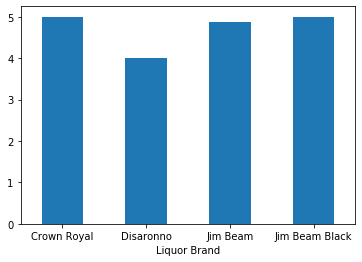

In [48]:
df = pd.DataFrame({'Liquor Brand':["Crown Royal", 'Disaronno', 'Jim Beam', 'Jim Beam Black'], 'Mean Rating':[5.000000, 4.000000 , 4.874074, 5.000000]})
ax = df.plot.bar(x='Liquor Brand', y='Mean Rating', rot=0)
ax.get_legend().remove()

plt.savefig("ratings.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

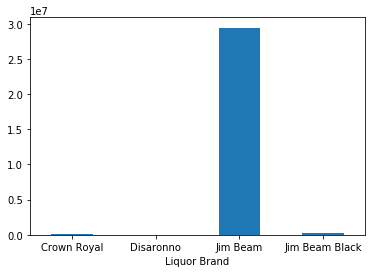

In [49]:
df = pd.DataFrame({'Liquor Brand':["Crown Royal", 'Disaronno', 'Jim Beam', 'Jim Beam Black'],
                   'Sales (Dollars)':[139363.2, 453.9000 , 29440760 , 193405.9]})
ax = df.plot.bar(x='Liquor Brand', y='Sales (Dollars)', rot=0)
ax.get_legend().remove()

plt.savefig("brand_sales.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)





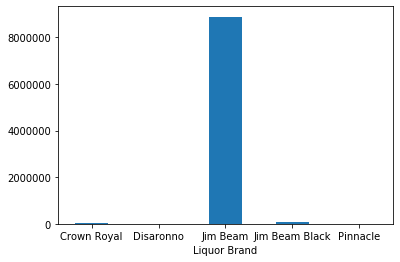

In [46]:
df = pd.DataFrame({'Liquor Brand':["Crown Royal", 'Disaronno', 'Jim Beam', 'Jim Beam Black', 'Pinnacle'],
                   'purchase count':[33411, 209 , 8881515 , 60788, 210]})
ax = df.plot.bar(x='Liquor Brand', y='purchase count', rot=0)
ax.get_legend().remove()

plt.savefig("brand_purchases.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

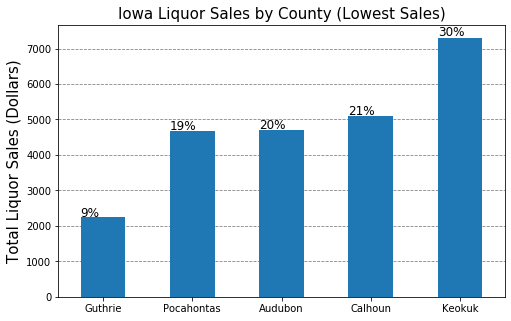

In [71]:
liquor_item_sales_county_sum_total = liquor_item_sales_county_sum.groupby("County", as_index=False).sum()
top5_counties=liquor_item_sales_county_sum_total.sort_values(by=["Sale (Dollars)"]).head()
ax = top5_counties.plot(x='County', y='Sale (Dollars)', kind='bar',rot=0,figsize=(8,5))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
total=top5_counties['Sale (Dollars)'].sum()
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(Decimal(str(p.get_height()/total*100))),(p.get_x(),p.get_height()*1.01), fontsize=12)
plt.xlabel('')
plt.ylabel('Total Liquor Sales (Dollars)', fontsize=15)
ax.get_legend().remove()
plt.title('Iowa Liquor Sales by County (Lowest Sales)', fontsize=15)


plt.savefig("county_sales_low.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [58]:
from decimal import Decimal


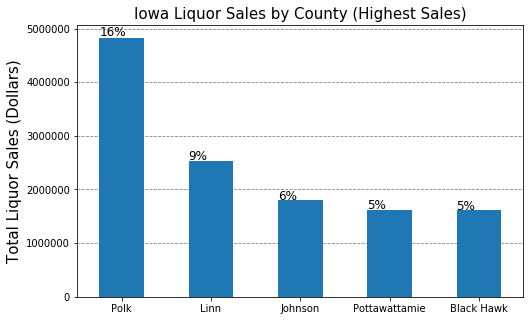

In [72]:
liquor_item_sales_county_sum_total=liquor_item_sales_county_sum.groupby(["County"],as_index=False).sum()
top5_county=liquor_item_sales_county_sum_total.sort_values("Sale (Dollars)", ascending=False).head()
ax = top5_county.plot(x='County', y='Sale (Dollars)', kind='bar',rot=0,figsize=(8,5))
total=liquor_item_sales_county_sum_total['Sale (Dollars)'].sum()
plt.title ('Iowa Liquor Sales by County (Highest Sales)', fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.ylabel('Total Liquor Sales (Dollars)', fontsize=15)
ax.get_legend().remove()
plt.xlabel('')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(Decimal(str(p.get_height()/total*100))),(p.get_x(),p.get_height()*1.01), fontsize=12)
    
plt.savefig("county_sales_high.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)